In [1]:
# Run this once!
%matplotlib inline
import os
os.chdir("./..")

In [2]:
%matplotlib inline
# Don't use pylab directive, it does something 
import pylab
import config
import logging
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tsa import entrainment, cross_correlogram
from session import SessionMapper, load_session
from tama import normalized_tama
import pandas as pd

features = ["F0_MEAN"]
logger = logging.getLogger('main')
pylab.rcParams['figure.figsize'] = (18,4)

mapper = SessionMapper()

sessions = []


sessions = [load_session(i) for i in range(1,13)]


Hagamos los time plots para las tareas que pasen el threshold


## Cross-Correlograms (Chatfield, página 170)

Let $r_{xy}(k)$ be the sample cross-correlation function for lag $k$. 

It can be shown that these estimators are asymptotically unbiased and consistent. However it can also be shown that
successive estimates are themselves autocorrelated. In addition the variances of the estimators depend on the
autocorrelation functions of the two components. Thus for moderately large values of N (e.g. N about 100) it is possible
for two series, which are actually uncorrelated, to give rise to apparently 'large' cross-correlation coefficients which are
actually spurious. Thus if a test is required for non-zero correlation between two time series, both series should first
be filtered to convert them to white noise before computing the cross-correlation function (Jenkins and Watts, 1968,
p. 340). For two uncorrelated series of white noise it can be shown that


\begin{align}
E(r_{xy}(k)) \sim 0 \\
Var(r_{xy}(k)) \sim 1/N \\
\end{align}

so that values outside the interval $2/\sqrt{N}$ are significantly
different from zero.







F0_MEAN
session-01
session-02
********************
F0_MEAN - session-02 - Task-04
A -> B = -0.19261 (lag = -6)
B -> A = -0.45350 (lag = 3)


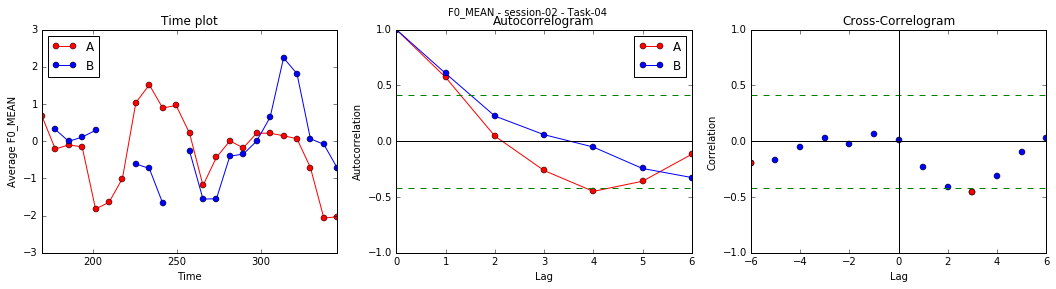

With prewhitening
A -> B = -0.24106 (lag = -6)
B -> A = -0.24949 (lag = 3)


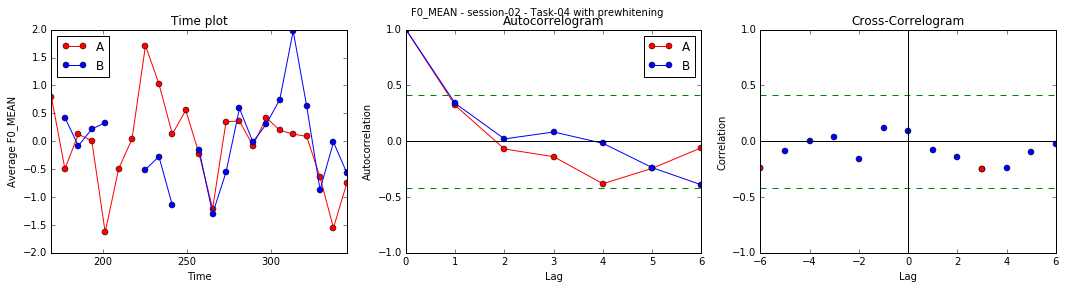

********************
F0_MEAN - session-02 - Task-08
A -> B = 0.16229 (lag = -1)
B -> A = 0.18330 (lag = 4)


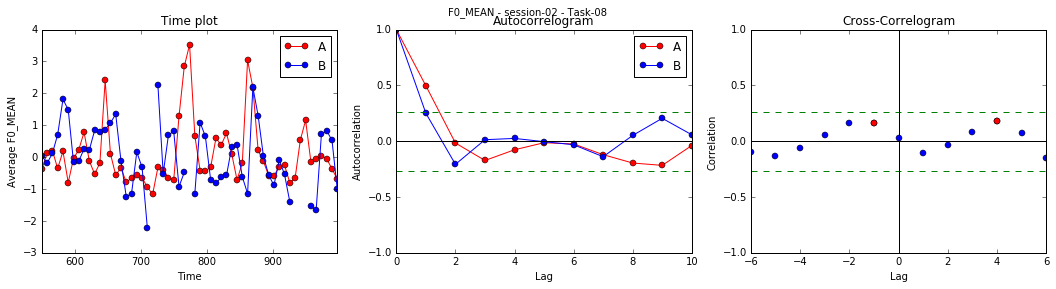

With prewhitening
A -> B = 0.14736 (lag = -1)
B -> A = 0.17428 (lag = 4)


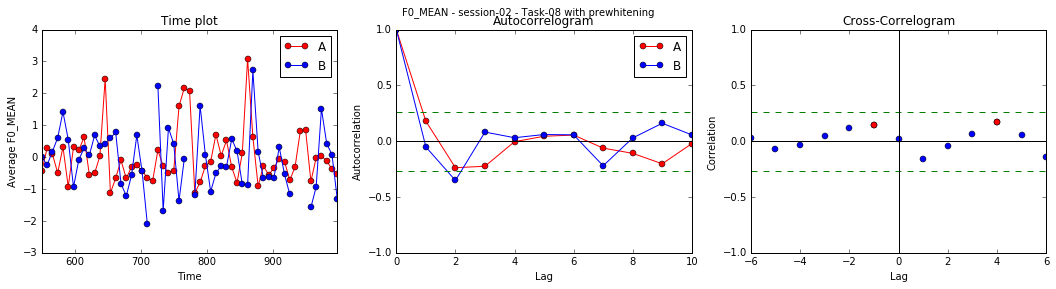

********************
F0_MEAN - session-02 - Task-10
A -> B = 0.44503 (lag = -3)
B -> A = -0.42546 (lag = 5)


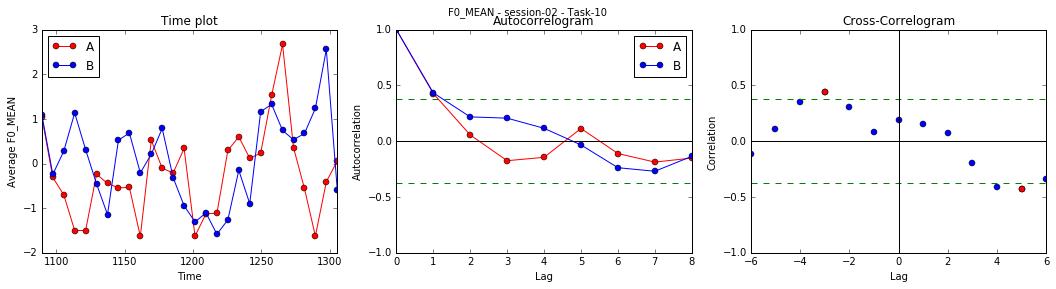

With prewhitening
A -> B = 0.31482 (lag = -3)
B -> A = -0.26730 (lag = 4)


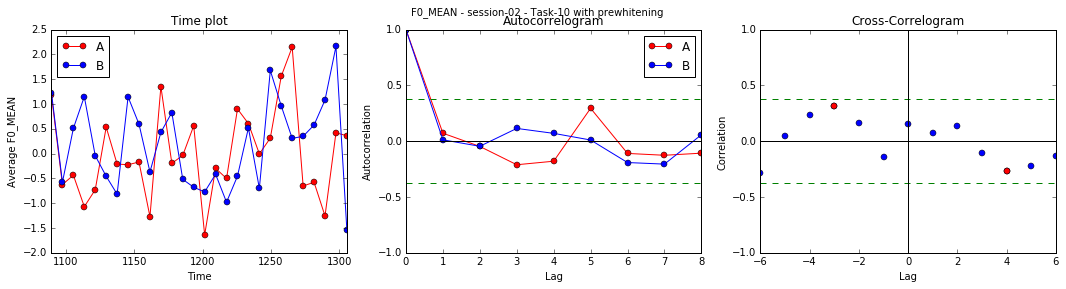

session-03
********************
F0_MEAN - session-03 - Task-01
A -> B = 0.64521 (lag = 0)
B -> A = 0.64521 (lag = 0)


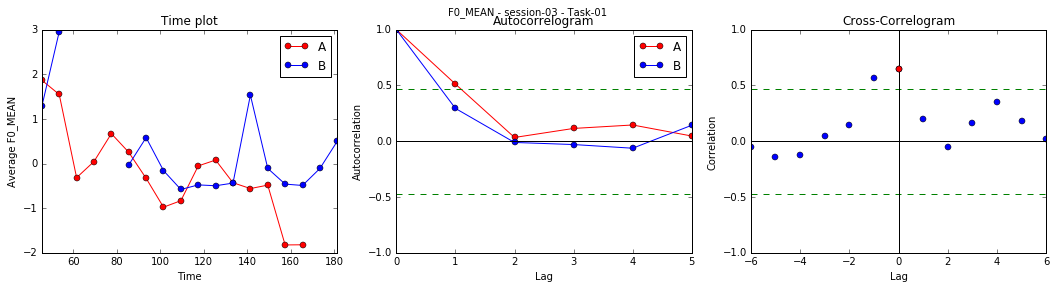

With prewhitening
A -> B = 0.46132 (lag = 0)
B -> A = 0.46132 (lag = 0)


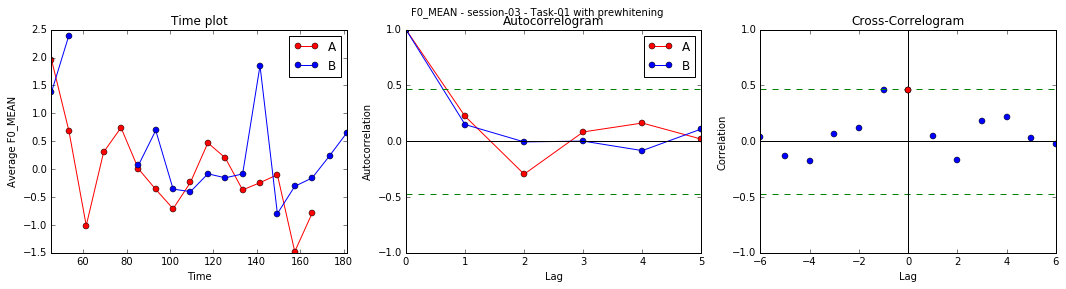

session-04
********************
F0_MEAN - session-04 - Task-08
A -> B = -0.30976 (lag = -2)
B -> A = 0.34928 (lag = 3)


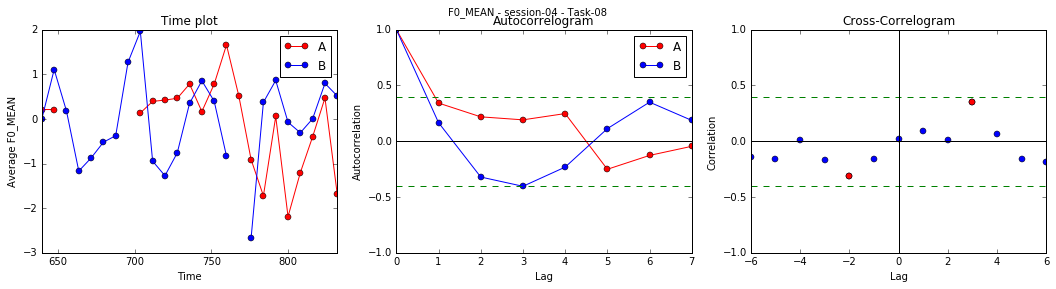

With prewhitening
A -> B = -0.26029 (lag = -2)
B -> A = 0.37861 (lag = 3)


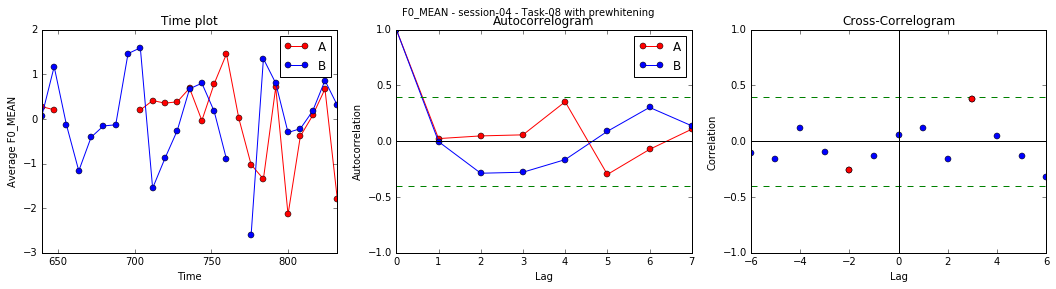

********************
F0_MEAN - session-04 - Task-10
A -> B = -0.30269 (lag = -1)
B -> A = -0.26030 (lag = 0)


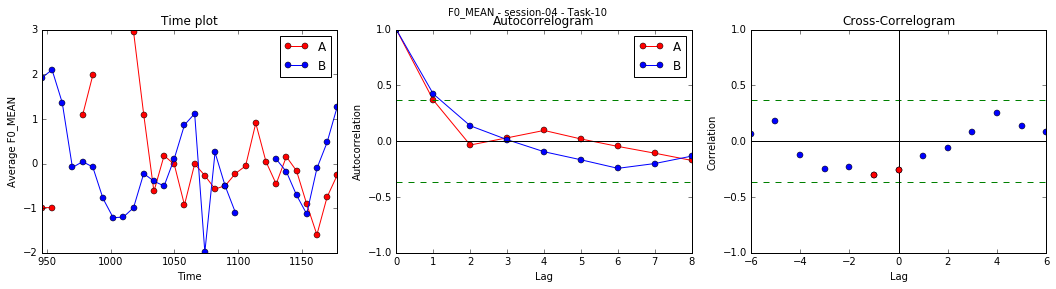

With prewhitening
A -> B = 0.27583 (lag = -5)
B -> A = 0.27078 (lag = 4)


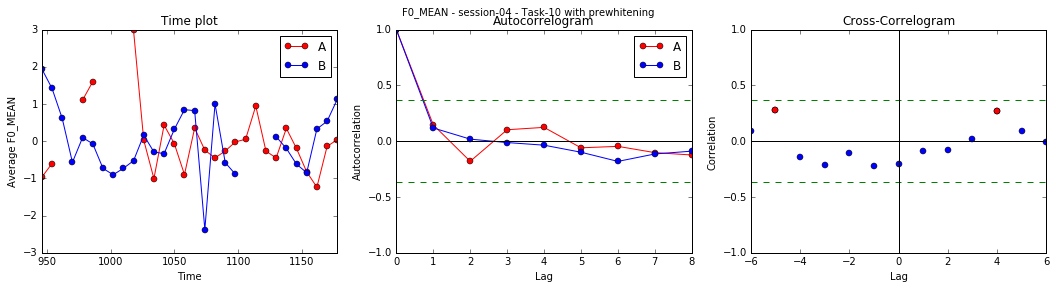

********************
F0_MEAN - session-04 - Task-13
A -> B = -0.41517 (lag = -3)
B -> A = 0.52700 (lag = 5)


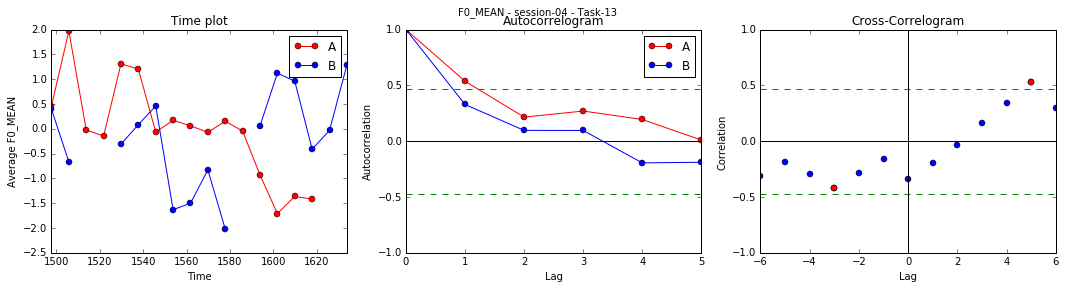

With prewhitening
A -> B = -0.39190 (lag = -6)
B -> A = 0.34850 (lag = 5)


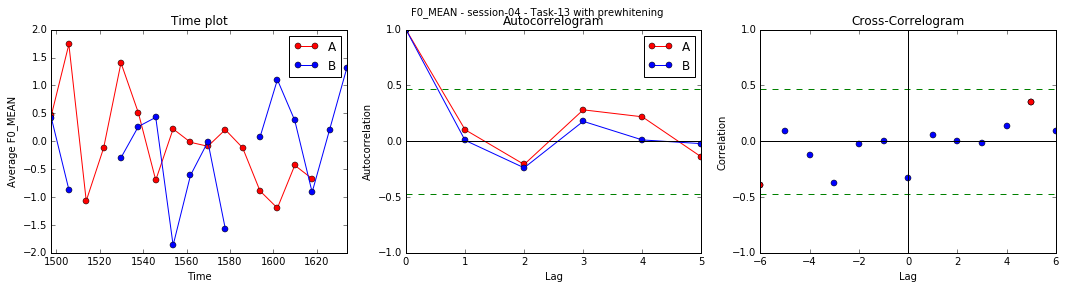

session-05
session-06
session-07
********************
F0_MEAN - session-07 - Task-05
A -> B = 0.35906 (lag = -6)
B -> A = 0.28898 (lag = 3)


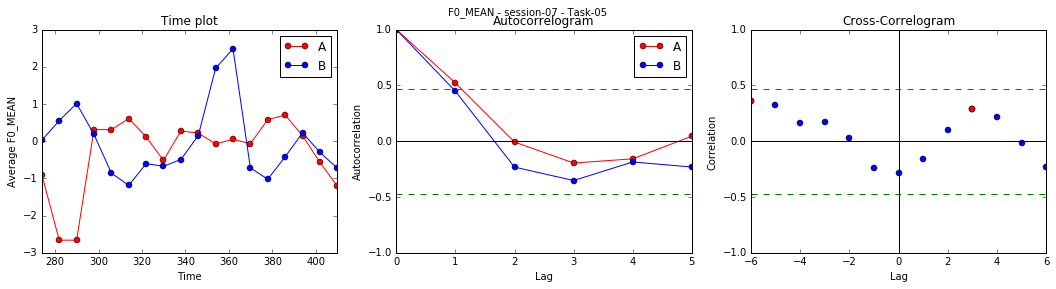

With prewhitening
A -> B = 0.27037 (lag = -6)
B -> A = 0.25439 (lag = 3)


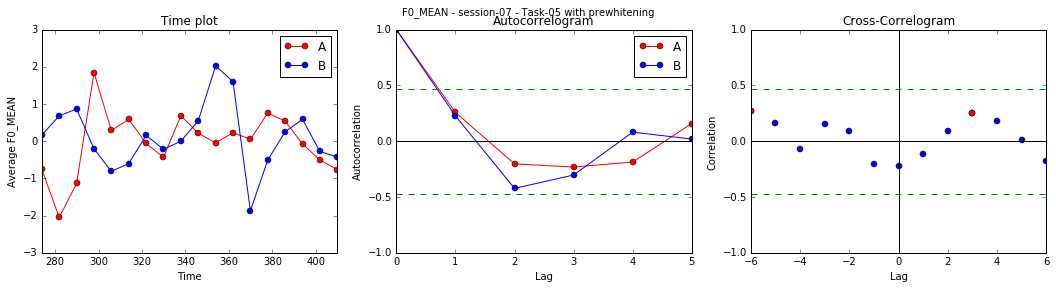

session-08
********************
F0_MEAN - session-08 - Task-14
A -> B = 0.36315 (lag = -6)
B -> A = -0.57678 (lag = 2)


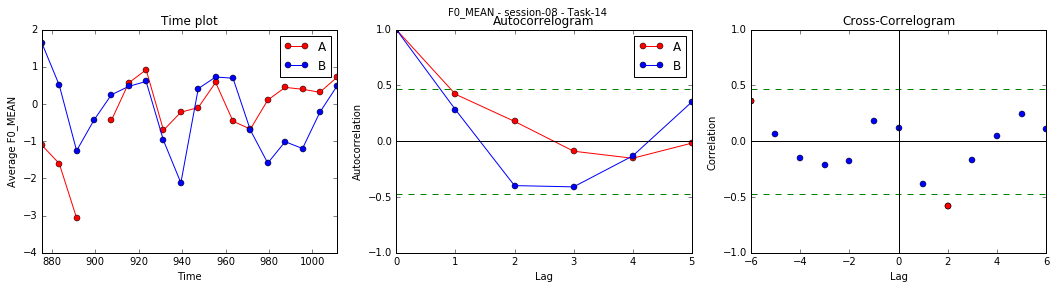

With prewhitening
A -> B = 0.32764 (lag = -6)
B -> A = -0.50836 (lag = 2)


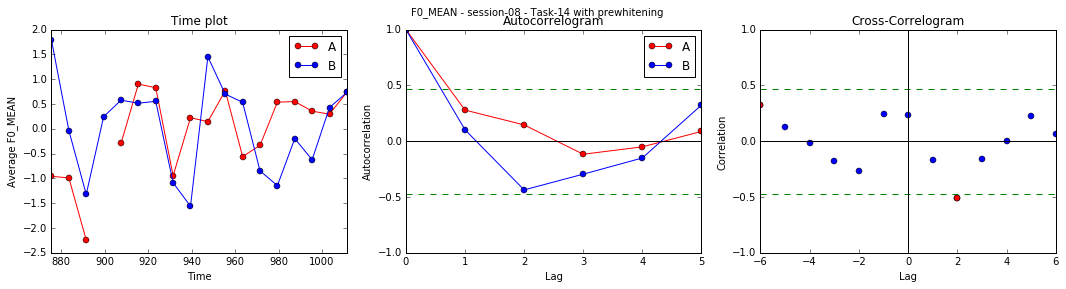

session-09
session-10
********************
F0_MEAN - session-10 - Task-04
A -> B = -0.29303 (lag = 0)
B -> A = -0.29303 (lag = 0)


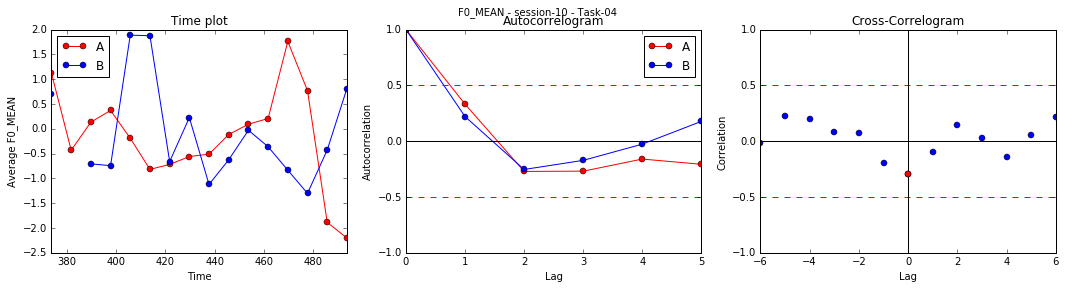

With prewhitening
A -> B = -0.26049 (lag = 0)
B -> A = -0.26049 (lag = 0)


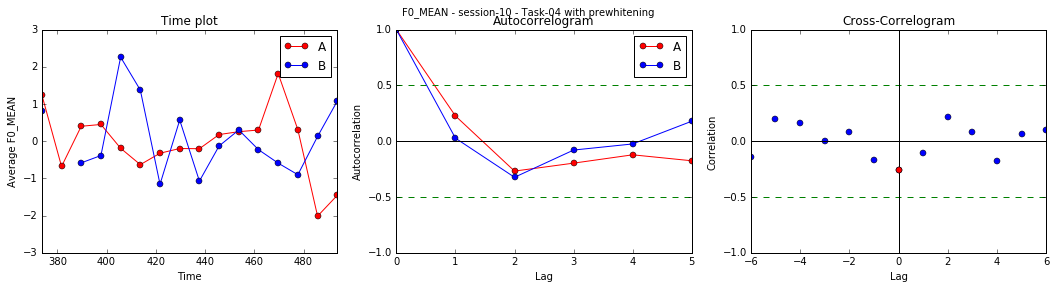

********************
F0_MEAN - session-10 - Task-08
A -> B = 0.31182 (lag = -6)
B -> A = -0.43093 (lag = 2)


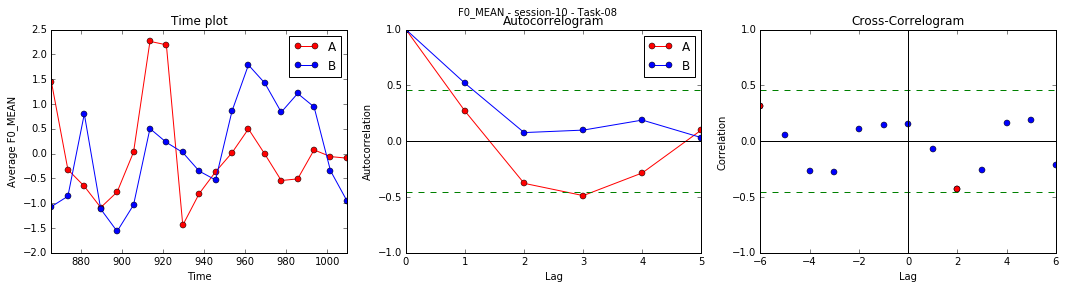

With prewhitening
A -> B = 0.32185 (lag = -6)
B -> A = -0.43683 (lag = 2)


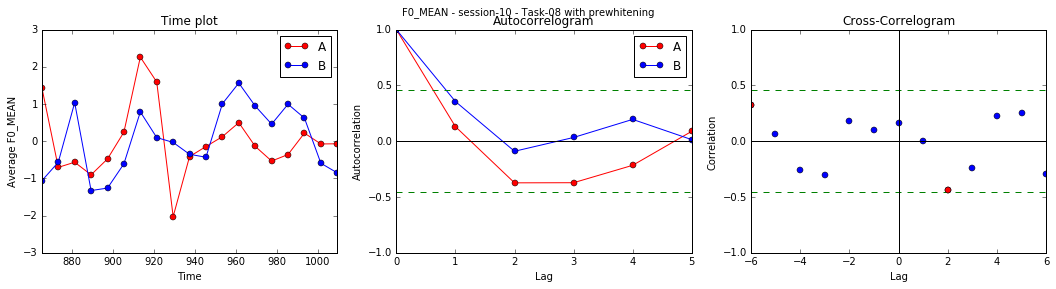

********************
F0_MEAN - session-10 - Task-09
A -> B = -0.27207 (lag = -4)
B -> A = -0.14435 (lag = 1)


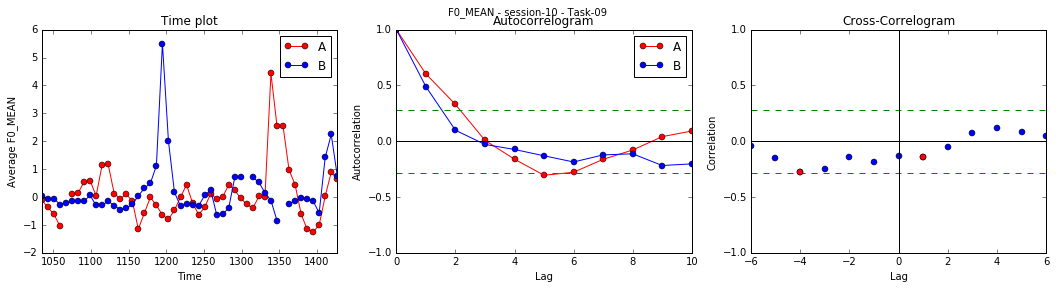

With prewhitening
A -> B = -0.20172 (lag = -4)
B -> A = 0.14408 (lag = 4)


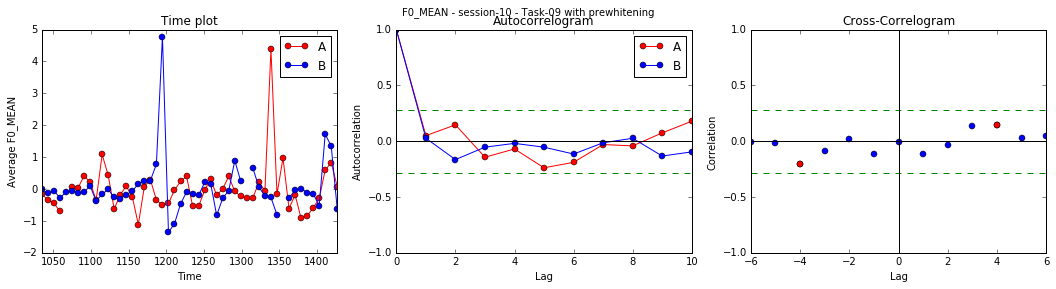

********************
F0_MEAN - session-10 - Task-10
A -> B = -0.20359 (lag = -2)
B -> A = 0.17224 (lag = 4)


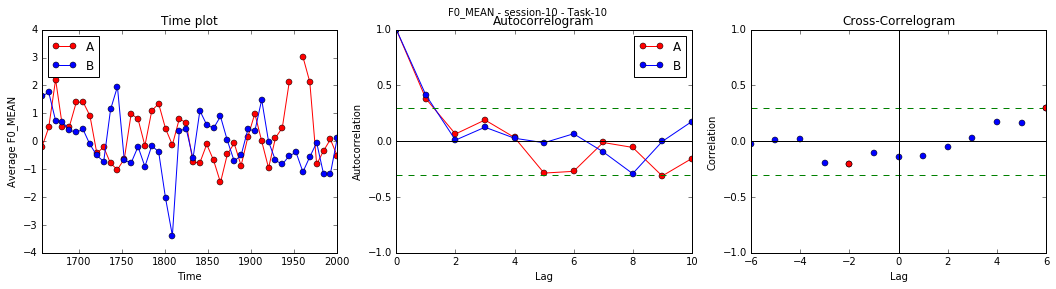

With prewhitening
A -> B = -0.18208 (lag = -3)
B -> A = 0.13443 (lag = 4)


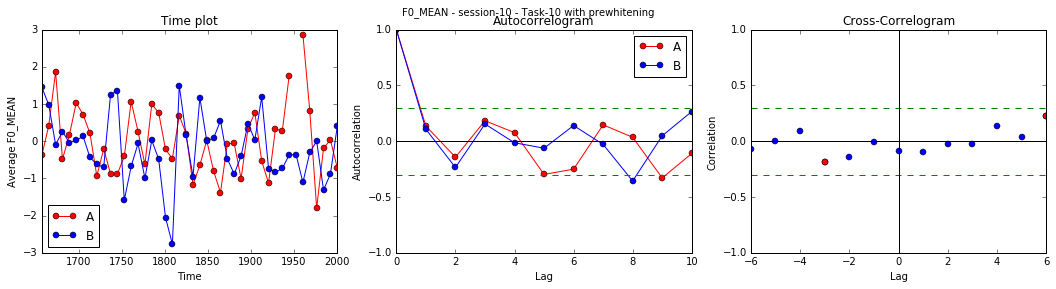

********************
F0_MEAN - session-10 - Task-13
A -> B = 0.35272 (lag = -3)
B -> A = 0.41097 (lag = 5)


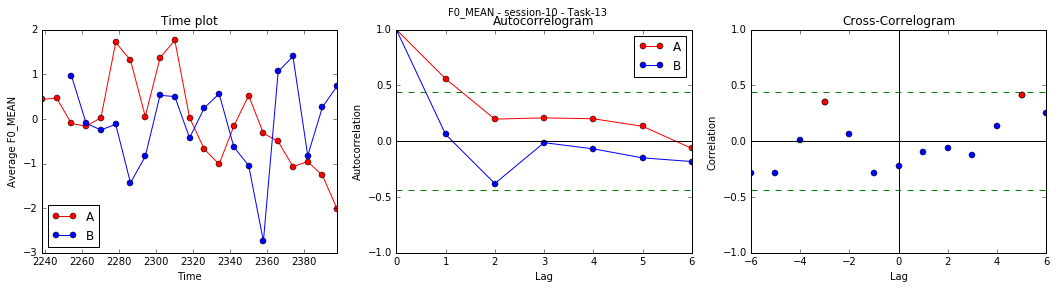

With prewhitening
A -> B = 0.46506 (lag = -3)
B -> A = 0.18690 (lag = 5)


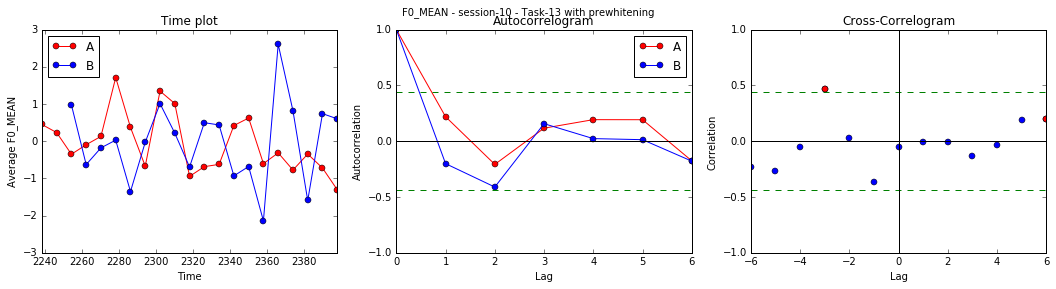

session-11
session-12


In [3]:
from helpers import plot_tamas, plot_cross_correlogram, plot_autocorrelations
from tsa import autoregressive_prewhitening
from tama import normalize

threshold = 15

def plot_for_series(A, B, feature, title=None):
    f, ax = plt.subplots(ncols=3)
    
    f.suptitle(title)

    plot_tamas(A, B, feature, ax[0])
    plot_autocorrelations(A, B, ax[1])
    plot_cross_correlogram(A, B, feature, ax[2])
    
    plt.show()


def plot_info(session, task, feature):
    
    A = normalized_tama(task.speechA, feature)
    B = normalized_tama(task.speechB, feature)
    title = "%s - %s - %s" % (feature, session.name, task.name)
    
    if (A.count() < threshold) or (B.count() < threshold):
        return
    
    print "*"*20 
    print title
    
    plot_for_series(A, B, feature, title=title)
    
    print "With prewhitening"
    
    
    rA, rB = autoregressive_prewhitening(A, B)
    plot_for_series(rA, rB, feature, title="%s with prewhitening" % title)
    
    
    
for feature in features:
    print("\n" * 5)
    print feature
    for session in sessions:
        print "="*80
        print session.name
        for task in session.tasks:
            plot_info(session, task, feature)
                

En las sesiones largas se ven menos plots lindos... Desconozco por qué.

Influye quizás la falta de estacionariedad? La aparición de outliers? O simplemente es algo esperable?

Un ejemplo

********************
F0_MEAN - session-10 - Task-09
A -> B = -0.27207 (lag = -4)
B -> A = -0.14435 (lag = 1)


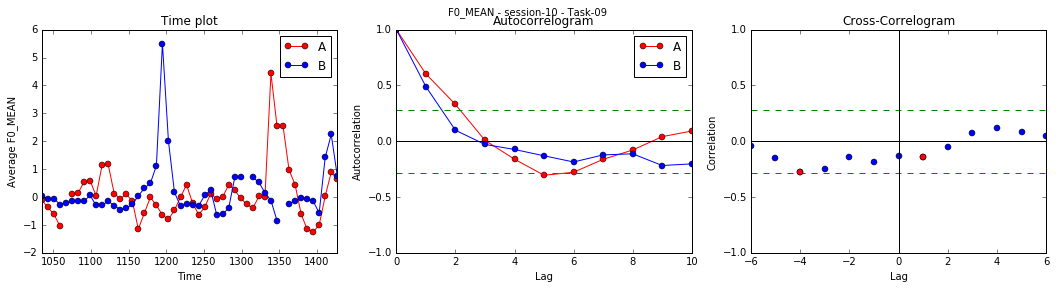

With prewhitening
A -> B = -0.20172 (lag = -4)
B -> A = 0.14408 (lag = 4)


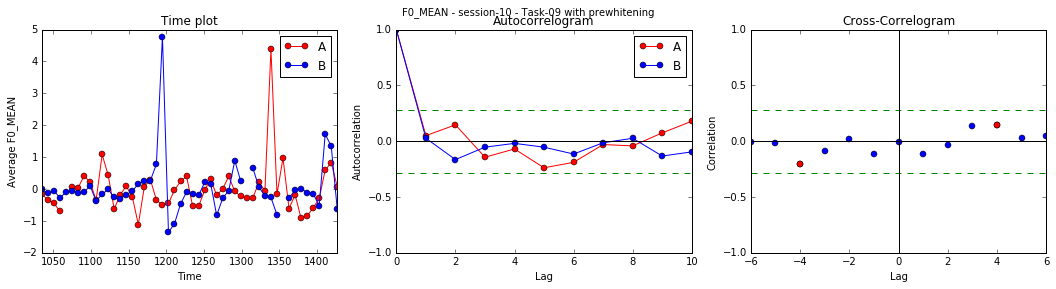

In [4]:
session = sessions[9]
task = session.tasks[8]

plot_info(session, task, "F0_MEAN")

## Prewhitening

Se puede observar que el prewhitening no cambia significativamente las series. ¿Es ésto porque el largo de las series no es muy grande? ¿o porque fittear un modelo AR(1) no es correcto?

Según se ve en el autocorrelograma, tienen aspecto de ser de tal forma.